In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.io import imread

def hog_plot(source,target,files):

# Load an example hand-drawn image
    image = imread(source, as_gray=True)

# Compute HOG features
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

# Rescale histogram for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Plot original and HOG image
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

    ax1.imshow(image, cmap=plt.cm.gray)
    ax1.set_title('Input Image')

    ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    ax2.set_title('Histogram of Oriented Gradients (HOG)')
    final=os.path.join(target,files)
    plt.savefig(final)

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.io import imread
def hog_plot(source,target,files):

# Load an example hand-drawn image
    image = imread(source, as_gray=True)

# Compute HOG features
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, channel_axis=None)

# Rescale histogram for better visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    plt.imshow(hog_image_rescaled, cmap=plt.cm.gray)
    plt.axis('off')  # Turn off axes
    #plt.tight_layout(pad=0)  # Remove white spaces
    final=os.path.join(target,files)
    plt.savefig(final, bbox_inches='tight', pad_inches=0)
    #plt.savefig(final)

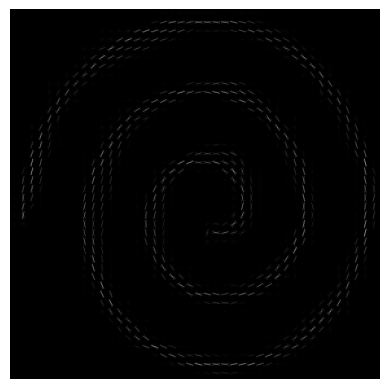

In [ ]:
path='/content/drive/MyDrive/Datasets/spiral/train/Healthy'
target='/content/sample_data/HOG/Healthy'
files = os.listdir(path)
for filename in files:
  filepath=os.path.join(path,filename)
  hog_plot(filepath,target,filename)



In [ ]:
import os

path='/content/sample_data/HOG/Patient'
os.mkdir(path)


In [ ]:
path = "/content/sample_data/spiral/train/Patient"
target_path= "/content/sample_data/HOG/Patient"
dir_list = os.listdir(path)
for files in dir_list:
  filepath = os.path.join(path, files)
  hog_plot(filepath,target_path,files)

In [ ]:
!unzip "/content/sample_data/spiral.zip" -d "/content/sample_data/"

In [ ]:
import shutil

def zip_folder(source_folder, output_zip):
    shutil.make_archive(output_zip, 'zip', source_folder)

# Specify the source folder and output zip file
source_folder = '/content/sample_data/HOG'
output_zip = '/content/sample_data/HOG'

# Call the function to zip the folder
zip_folder(source_folder, output_zip)


In [ ]:
# Function to convert JPEG images to PNG format recursively
from PIL import Image
import os


def convert_jpg_to_png_recursive(folder_path):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.jpg'):
                file_path = os.path.join(root, file)
                img = Image.open(file_path)
                png_file_path = os.path.splitext(file_path)[0] + '.png'
                img.save(png_file_path, 'PNG')
                print(f"Converted {file} to PNG format")

# Provide the path to the 'spiral' folder
folder_path = '/content/sample_data/spiral'

# Convert JPEG images to PNG format recursively in all subfolders
convert_jpg_to_png_recursive(os.path.join(folder_path, 'train'))
convert_jpg_to_png_recursive(os.path.join(folder_path, 'val'))


In [ ]:

def delete_jpg_files(folder):
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.jpg'):
                file_path = os.path.join(root, file)
                os.remove(file_path)
                print(f"Deleted: {file_path}")

# Provide the path to the main folder
main_folder = '/content/sample_data/spiral'

# Call the function to delete JPG files in all subfolders
delete_jpg_files(main_folder)

In [ ]:
import shutil
import os

def move_files(source_folder, destination_folder):
    # Create destination folder if it doesn't exist
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)

    # Iterate through files in source folder
    for filename in os.listdir(source_folder):
        source_file = os.path.join(source_folder, filename)
        destination_file = os.path.join(destination_folder, filename)
        shutil.move(source_file, destination_file)
        print(f"Moved {filename} to {destination_folder}")

# Provide the paths to the source and destination folders
source_folder = '/content/sample_data/spiral/val/Healthy'
destination_folder = '/content/sample_data/spiral/train/Healthy'

# Move files from source to destination folder
move_files(source_folder, destination_folder)


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.io import imread
from skimage.color import rgb2gray

def compute_hog_features(image):

    # Compute HOG features
    fd, _ = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True,channel_axis=2 )
    return fd

# Load hand-drawn images and compute HOG features
X = []
y = []

# Assuming you have a directory containing PNG images, each in its own subdirectory with the label as the directory name
data_dir = '/content/drive/MyDrive/Datasets/meander'

label_mapping = {'Healthy': 0, 'Patient': 1}

for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    label_id = label_mapping.get(label, None)
    if label_id is None:
        continue  # Skip directories not in label_mapping
    for file_name in os.listdir(label_dir):
        file_path = os.path.join(label_dir, file_name)
        image = imread(file_path)
        hog_features = compute_hog_features(image)
        X.append(hog_features)
        y.append(label_id)

# Convert lists to numpy arrays
X = np.array(X, dtype=object)
y = np.array(y)


## **Training using hog images**

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import exposure
from skimage.io import imread
from skimage.color import rgb2gray
import cv2

def compute_hog_features(image):

    # Compute HOG features
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True,channel_axis=2 )
    return hog_image

# Load hand-drawn images and compute HOG features
X = []
y = []

# Assuming you have a directory containing PNG images, each in its own subdirectory with the label as the directory name
data_dir = '/content/drive/MyDrive/Datasets/meander'

label_mapping = {'Healthy': 0, 'Patient': 1}

for label in os.listdir(data_dir):
    label_dir = os.path.join(data_dir, label)
    label_id = label_mapping.get(label, None)
    if label_id is None:
        continue  # Skip directories not in label_mapping
    for file_name in os.listdir(label_dir):
        file_path = os.path.join(label_dir, file_name)
        image = imread(file_path)
        hog_features = compute_hog_features(image)
        hog_features = cv2.resize(hog_features, (128, 128))
        X.append(hog_features)
        y.append(label_id)

# Convert lists to numpy arrays
X = np.array(X, dtype=object)
y = np.array(y)


In [ ]:
hog_image.shape

NameError: name 'hog_image' is not defined

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense , Dropout, Conv2D, MaxPooling2D, Flatten
from keras.regularizers import l1, l2
# Assume X contains HOG features and y contains labels
# Ensure all HOG features have the same length
'''
max_hog_length = max(len(features) for features in X)
X_padded = np.array([np.pad(features, (0, max_hog_length - len(features)), mode='constant') for features in X])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
'''
model = Sequential([
    # Convolutional layer with 32 filters, kernel size 3x3, ReLU activation, and input shape (image_height, image_width, num_channels)
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    # Max pooling layer with pool size 2x2
    MaxPooling2D((2, 2)),
    # Convolutional layer with 64 filters, kernel size 3x3, ReLU activation
    Conv2D(64, (3, 3), activation='relu'),
    # Max pooling layer with pool size 2x2
    MaxPooling2D((2, 2)),
    # Convolutional layer with 128 filters, kernel size 3x3, ReLU activation
    Conv2D(128, (3, 3), activation='relu'),
    # Flatten layer to convert 3D feature maps to 1D feature vectors
    Flatten(),
    # Dense (fully connected) layer with 128 units and ReLU activation
    Dense(128, activation='relu'),
    # Output layer with 2 units (two output classes) and softmax activation
    Dense(2, activation='softmax')
])
'''# Define the model architecture
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],), kernel_regularizer=l2(0.01)),
    #Dropout(0.5),  # Dropout layer with 50% dropout rate
    Dense(32, activation='relu'),
    #Dropout(0.2),  # Dropout layer with 50% dropout rate
    Dense(2, activation='softmax')
])
'''

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Assuming binary classification
              metrics=['accuracy'])



In [ ]:
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


In [ ]:
model.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:

# Train the model
history = model.fit(X_train_scaled, y_train_one_hot, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test_one_hot))

Epoch 1/10


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(None, 15456)


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test_one_hot)
print('Test accuracy:', accuracy)

2/2 [==============================] - 0s 15ms/step - loss: 1.1985 - accuracy: 0.8800
Test accuracy: 0.8799999952316284


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assume you have trained your model and obtained predictions
# Replace these lines with your actual model and predictions
# model = your_model
# X_test_scaled = your_scaled_test_features
# y_test = your_actual_labels

# Obtain predictions
y_pred = model.predict(X_test_scaled)
threshold = 0.5
y_pred_classes = (y_pred >= threshold).astype(int)
y_test_one_hot = (y_test_one_hot >= threshold).astype(int)

# Convert one-hot encoded to class labels
#y_pred_classes = y_pred_classes[0]
# If your model outputs probabilities, you may want to threshold them
# Example: y_pred_classes = (y_pred > 0.5).astype(int)

# Print classification report
print("Classification Report:\n", classification_report(y_test_one_hot, y_pred_classes))




2/2 [==============================] - 0s 8ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.67      0.72        27
           1       0.86      0.52      0.65        23

   micro avg       0.81      0.60      0.69        50
   macro avg       0.82      0.59      0.68        50
weighted avg       0.82      0.60      0.69        50
 samples avg       0.54      0.60      0.56        50



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


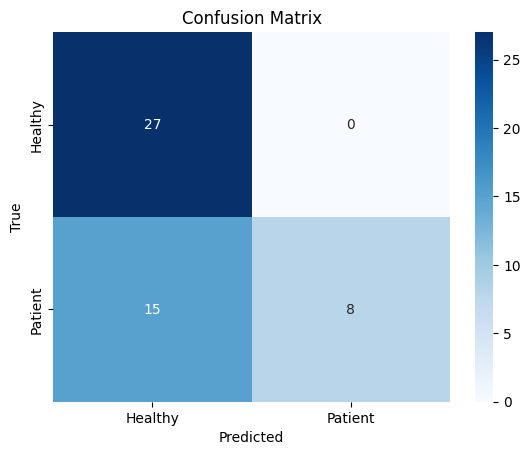

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Your true labels (ground truth)
y_true = np.argmax(y_test_one_hot, axis=1)

# Your predicted labels
y_pred = np.argmax(y_pred_classes, axis=1)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy', 'Patient'], yticklabels=['Healthy', 'Patient'])

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
# Replace 'path_to_your_image.jpg' with the actual path to your image
image_path = '/content/drive/MyDrive/Datasets/spiral/train/Patient/sp1-P1.png'

# Read and preprocess the image
new_image = rgb2gray(imread(image_path))  # Convert to grayscale (adjust if needed)
# Apply the same preprocessing steps as during training
# For example, resizing the image to the same size used during training

fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)

new_image_flattened = new_image_resized.reshape(1, -1)  # Flatten the image to a 1D array

# Standardize the features (using the same scaler as during training)
new_image_scaled = scaler.transform(new_image_flattened)

# Make predictions
prediction = svm_classifier.predict(new_image_scaled)

# Print the prediction
print(f'Prediction: {prediction}')


<ipython-input-63-eeba9fef87aa>:9: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),


ValueError: Only images with two spatial dimensions are supported. If using with color/multichannel images, specify `channel_axis`.

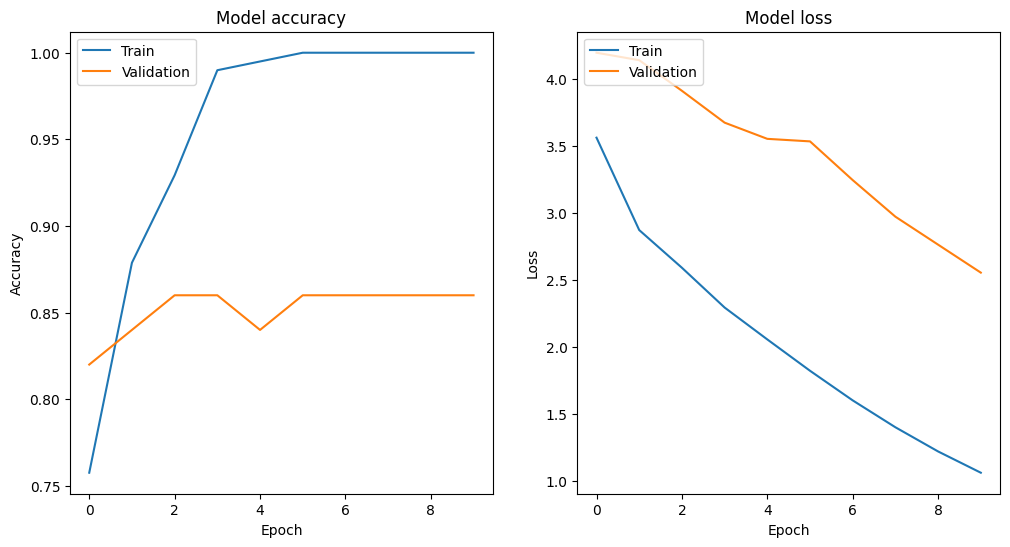

In [ ]:
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [ ]:
print(y_pred_classes)

In [ ]:
#SVM
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assume X contains HOG features and y contains labels
# Ensure all HOG features have the same length
max_hog_length = max(len(features) for features in X)
X_padded = np.array([np.pad(features, (0, max_hog_length - len(features)), mode='constant') for features in X])

X_flattened = X_padded.reshape(X_padded.shape[0], -1)
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_flattened, y, test_size=0.2, random_state=42)

# Standardize the features (important for SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', C=1.0)  # You can try different kernels like 'rbf', 'poly', etc.

# Train the SVM classifier
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Accuracy: 0.9
Confusion Matrix:
[[20  4]
 [ 1 25]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.83      0.89        24
           1       0.86      0.96      0.91        26

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2211968   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 2220354 (8.47 MB)
Trainable params: 2220354 (8.47 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
print(y_pred)

[1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 0
 0 1 1 0 1 1 0 1 1 1 0 1 0]
